In [140]:
import pandas as pd
import matplotlib.pyplot as plt

DATASET LOADING 

In [141]:
data=pd.read_csv("real_estate_usa.csv")

In [142]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [143]:
data.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


DATA PREPROCESSING

Checking for null values


In [145]:
data.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

Dropping columns

In [146]:
#checking the number of unique values in the column to check if it contributes to the data
print(data['brokered_by'].nunique())
#as there are a lot of unique values in the column, it is not contributing to the data because it seems to be an ID which isnt contributing to the data
#hence we can drop the column
data=data.drop(columns=["brokered_by"])

110143


In [147]:
#similarly for zip_code and prev_sold_date we dont have any use of these columns in the data so we can drop them
data=data.drop(columns=["zip_code","prev_sold_date"])

In [148]:
data

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


Filling NA values

In [149]:
data["price"]=data["price"].fillna(data["price"].mean())
data["acre_lot"]=data["acre_lot"].fillna(data["acre_lot"].mean())


In [150]:
data.isna().sum()

status             0
price              0
bed           481317
bath          511771
acre_lot           0
street         10866
city            1407
state              8
house_size    568484
dtype: int64

In [151]:
data["bed"]=data["bed"].fillna(data["bed"].median())
data["bath"]=data["bath"].fillna(data["bath"].median())



In [152]:
data.isna().sum()

status             0
price              0
bed                0
bath               0
acre_lot           0
street         10866
city            1407
state              8
house_size    568484
dtype: int64

In [153]:
print(data.isna().sum().sum())
# total number of missing values in the data 
data.dropna(inplace=True)
#drops rows with even a single missing value
data.shape


580765


(1650824, 9)

In [154]:
data.duplicated().sum()

707

Dropping duplicate attributes

In [155]:
data.drop_duplicates(inplace=True)
data.shape

(1650117, 9)

DATA VISUALIZATION

status
for_sale          919638
sold              706323
ready_to_build     24156
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x26eb6c96c00>,
 [Text(-0.19700413326524596, 1.0822150301471558, 'for_sale'),
  Text(0.14704268528485756, -1.0901277212805014, 'sold'),
  Text(1.0988369289480744, -0.0505707779252499, 'ready_to_build')],
 [Text(-0.10745679996286144, 0.590299107352994, '55.73%'),
  Text(0.08020510106446775, -0.5946151206984552, '42.80%'),
  Text(0.5993655976080404, -0.027584060686499944, '1.46%')])

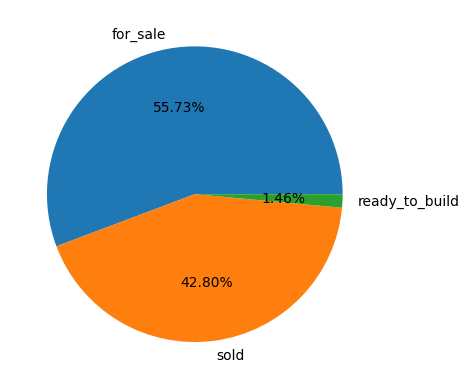

In [156]:
status_count=data['status'].value_counts()
print(status_count)
plt.pie(status_count,labels=status_count.index,autopct="%.2f%%")

<BarContainer object of 54 artists>

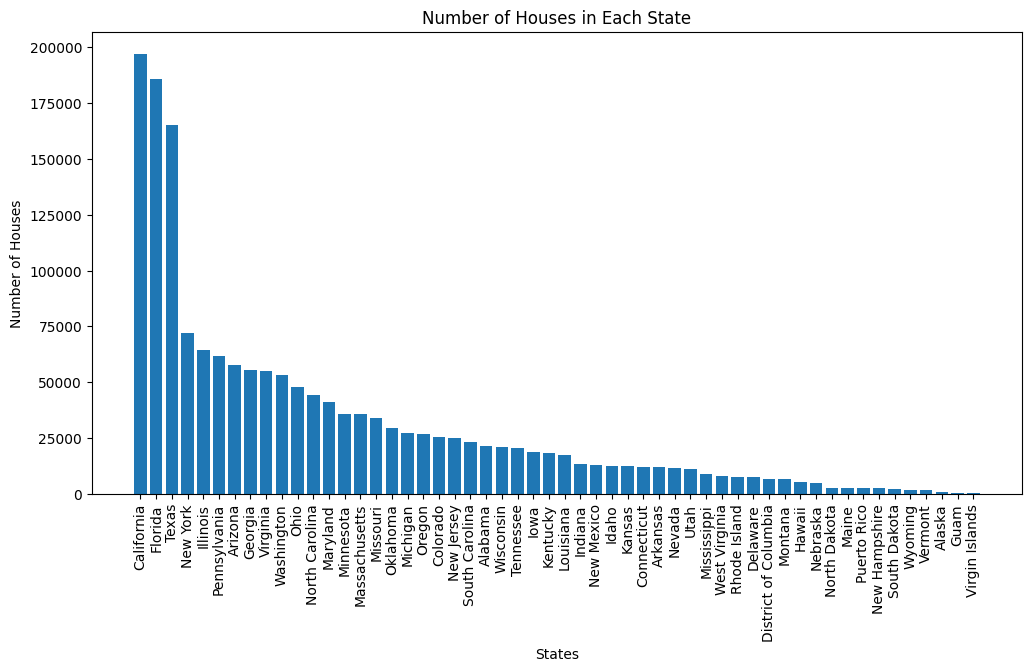

In [157]:
street_count=data['state'].value_counts()
plt.figure(figsize=(12, 6)) 
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Number of Houses")
plt.title("Number of Houses in Each State")
plt.bar(street_count.index,street_count.values)



CORRELATION ANALYSIS

In [158]:
data.select_dtypes(include=["number"]).corr()

,price,bed,bath,acre_lot,street,house_size
price,1.000000,0.114507,0.200776,0.005219,-0.001496,0.000251
bed,0.114507,1.000000,0.633833,-0.000461,-0.001025,0.000757
bath,0.200776,0.633833,1.000000,-0.001205,-0.000896,0.000780
acre_lot,0.005219,-0.000461,-0.001205,1.000000,0.000599,0.000019
street,-0.001496,-0.001025,-0.000896,0.000599,1.000000,0.000314
house_size,0.000251,0.000757,0.000780,0.000019,0.000314,1.000000


Converting object data to corresponding numeric values

In [159]:
state_price_mapping = data.groupby('state')['price'].mean()
data['state_price'] = data['state'].map(state_price_mapping).astype(int)

In [160]:
data.head()

,status,price,bed,bath,acre_lot,street,city,state,house_size,state_price
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0,606644
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0,606644
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0,606644
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0,606644
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0,606644


In [162]:
state_names=data[['state','state_price']].drop_duplicates()
state_names.to_csv("states_nap.csv", index=False)



In [ ]:
data

,status,price,bed,bath,acre_lot,street,city,state,house_size,state_price
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,92500,Puerto Rico,920.0,606644
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,92500,Puerto Rico,1527.0,606644
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,114607,Puerto Rico,748.0,606644
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,200570,Puerto Rico,1800.0,606644
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,193992,Puerto Rico,2520.0,606644
...,...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,475231,Washington,3600.0,702289
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,475231,Washington,1616.0,702289
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,475231,Washington,3200.0,702289
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,475231,Washington,933.0,702289


In [164]:
df=data.select_dtypes(include=["number"])
df.head()

,price,bed,bath,acre_lot,street,house_size,state_price
0,105000.0,3.0,2.0,0.12,1962661.0,920.0,606644
1,80000.0,4.0,2.0,0.08,1902874.0,1527.0,606644
2,67000.0,2.0,1.0,0.15,1404990.0,748.0,606644
3,145000.0,4.0,2.0,0.10,1947675.0,1800.0,606644
5,179000.0,4.0,3.0,0.46,1850806.0,2520.0,606644


MODEL TRAINING AND TESTING


In [ ]:
x=data[["bed","bath","city","house_size"]]

In [ ]:
y=data["price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
#for normalisatiom

In [ ]:
x_train=scalar.fit_transform(x_train)
x_train

array([[ 4.60049308e-01,  3.94953507e-01, -1.99330436e-01,
        -1.13035975e-03],
       [ 1.08752115e+00, -3.69463147e-01, -7.37896665e-01,
        -1.83652816e-03],
       [ 1.08752115e+00,  1.15937016e+00,  9.20517243e-01,
        -7.14609304e-04],
       ...,
       [ 4.60049308e-01, -3.69463147e-01, -8.06207050e-01,
        -1.94032774e-03],
       [ 4.60049308e-01,  1.15937016e+00,  7.11378581e-02,
        -1.12428637e-03],
       [-1.67422538e-01,  3.94953507e-01, -6.06712181e-01,
        -1.92486823e-03]])

In [ ]:
import joblib 
joblib.dump(scalar,"scalar_re.pkl")

['scalar_re.pkl']

In [ ]:
x_test=scalar.transform(x_test)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions_lr=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np


In [ ]:
mae_lr=mean_absolute_error(y_test,predictions_lr)

In [ ]:
rmse_lr=np.sqrt(mean_squared_error(y_test,predictions_lr))

In [ ]:
r2_lr=r2_score(y_test,predictions_lr)

In [ ]:
print("MAE for Linear Regression is ",mae_lr)
print("RMSE for Linear Regression is ",rmse_lr)
print("R2 Score for Linear Regression is ",r2_lr)

MAE for Linear Regression is  306736.802418789
RMSE for Linear Regression is  1084201.2424437725
R2 Score for Linear Regression is  0.7678060153426312


Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [ ]:
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [20, 30, 40],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search_rf=GridSearchCV(rf,param_grid,cv=5)

In [165]:
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 70]})

In [166]:
pd.DataFrame(grid_search_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.310769,0.564579,0.803260,0.042262,None,1,2,20,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.428568,0.051067,0.267491,0.367642,0.462022,0.315358,0.147785,12
1,70.176007,24.023064,2.614821,0.793320,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.320614,0.049987,0.316478,-0.265531,0.463700,0.177050,0.258551,71
2,71.441019,26.460993,2.899489,0.266047,None,1,2,70,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.470093,0.051774,0.253969,-0.075060,0.466451,0.233445,0.218584,57
3,34.708316,4.357867,1.294300,0.256170,None,1,5,20,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.311046,0.056656,0.242373,0.233109,0.466359,0.261908,0.132328,43
4,62.934883,23.839690,2.250557,0.920133,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.270721,0.055644,0.170142,0.272671,0.463801,0.246596,0.134720,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,23.659113,0.224404,0.565913,0.025243,20,4,5,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.508906,0.057294,0.243458,0.204221,0.435379,0.289852,0.162930,27
77,32.910429,0.312632,0.832224,0.061532,20,4,5,70,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.470497,0.055916,0.301637,0.257220,0.449678,0.306990,0.150092,18
78,9.458976,0.080518,0.230657,0.017863,20,4,10,20,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.513533,0.058455,0.199846,0.217916,0.442297,0.286409,0.167352,29
79,23.474541,0.142938,0.555512,0.010294,20,4,10,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.477588,0.057322,0.297775,0.294099,0.450546,0.315466,0.149625,11


In [167]:
best_rf=grid_search_rf.best_estimator_

In [169]:
best_combo_rf=grid_search_rf.best_params_
best_combo_rf

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 20}

In [170]:
predictions_rf=best_rf.predict(x_test)

In [174]:
mae_rf=mean_absolute_error(y_test,predictions_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,predictions_rf))
r2_rf=r2_score(y_test,predictions_rf)
print("MAE for Random Forest is ",mae_rf)
print("RMSE for Random Forest is ",rmse_rf)
print("R2 Score for Random Forest is ",r2_rf)

MAE for Random Forest is  206916.65300354923
RMSE for Random Forest is  2101324.798662965
R2 Score for Random Forest is  0.12779708273559587


Gradient Boosting Regression

In [ ]:
gb=GradientBoostingRegressor()
param_grid={
    'n_estimators': [20, 30, 40],
    'max_depth': [None, 10, 20],
    'random_state': [42]
}

In [179]:
gridgb=GridSearchCV(gb,param_grid,cv=5)
gridgb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [20, 50, 70], 'random_state': [42]})

In [180]:
pd.DataFrame(gridgb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.412650,0.697528,1.018979,0.136632,None,20,42,"{'max_depth': None, 'n_estimators': 20, 'rando...",0.236399,0.027595,0.141475,0.245022,0.190571,0.168212,0.079419,5
1,72.725270,4.120175,2.902669,0.220238,None,50,42,"{'max_depth': None, 'n_estimators': 50, 'rando...",0.130558,0.018920,0.012144,0.195914,0.106446,0.092796,0.069582,8
2,104.845900,4.237197,4.644457,0.265442,None,70,42,"{'max_depth': None, 'n_estimators': 70, 'rando...",0.125901,0.018502,0.006690,0.193673,0.102699,0.089493,0.069641,9
3,11.791164,0.404850,0.093142,0.011074,10,20,42,"{'max_depth': 10, 'n_estimators': 20, 'random_...",0.464064,0.055009,0.505788,0.369512,0.349511,0.348777,0.157907,1
4,30.380083,0.192579,0.160365,0.011508,10,50,42,"{'max_depth': 10, 'n_estimators': 50, 'random_...",0.467493,0.053992,0.518894,0.235366,0.372170,0.329583,0.168225,2
5,41.974209,0.850746,0.187809,0.016264,10,70,42,"{'max_depth': 10, 'n_estimators': 70, 'random_...",0.466110,0.053973,0.523811,0.225358,0.374282,0.328707,0.170401,3
6,20.702354,0.389432,0.330281,0.019372,20,20,42,"{'max_depth': 20, 'n_estimators': 20, 'random_...",0.291930,0.033082,0.176617,0.266511,0.195554,0.192739,0.090597,4
7,51.310758,1.750856,0.563639,0.009164,20,50,42,"{'max_depth': 20, 'n_estimators': 50, 'random_...",0.217250,0.027914,0.080163,0.231957,0.126670,0.136791,0.078350,6
8,71.986681,1.695000,0.648728,0.059981,20,70,42,"{'max_depth': 20, 'n_estimators': 70, 'random_...",0.215299,0.027732,0.078810,0.231362,0.124690,0.135579,0.078105,7


In [184]:
best_combo_gb=gridgb.best_params_
best_combo_gb

{'max_depth': 10, 'n_estimators': 20, 'random_state': 42}

In [185]:
best_gb=gridgb.best_estimator_

In [186]:
predictions_gb=best_gb.predict(x_test)

In [187]:
mae_gb=mean_absolute_error(y_test,predictions_gb)
rmse_gb=np.sqrt(mean_squared_error(y_test,predictions_gb))
r2_gb=r2_score(y_test,predictions_gb)
print("MAE for Gradient Boosting is ",mae_gb)
print("RMSE for Gradient Boosting is ",rmse_gb)
print("R2 Score for Gradient Boosting is ",r2_gb)

MAE for Gradient Boosting is  213011.76705625243
RMSE for Gradient Boosting is  2091549.7711213636
R2 Score for Gradient Boosting is  0.13589290609014337


Comparing best metrics

In [195]:
mae_scores=[mae_lr,mae_rf,mae_gb]
rmse_scores=[rmse_lr,rmse_rf,rmse_gb]
r2_scores=[r2_lr,r2_rf,r2_gb]
labels=["LinearRegression","RandomForest","GradientBoosting"]


Text(0, 0.5, 'Minimum absoltute error')

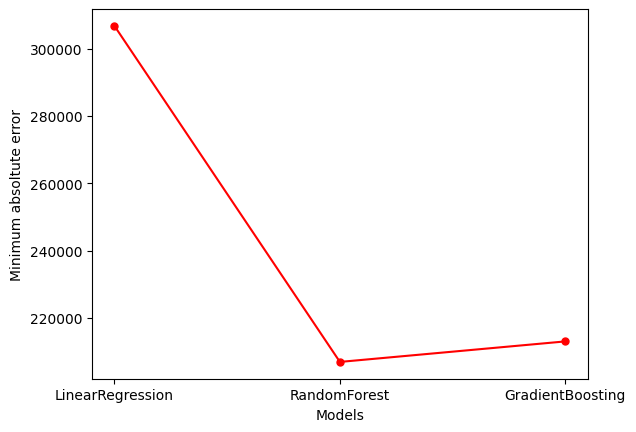

In [202]:
plt.plot(labels,mae_scores,marker=".",color="red",markersize=10)
plt.xlabel("Models")
plt.ylabel("Minimum absoltute error")

Text(0, 0.5, 'Root mean squared error')

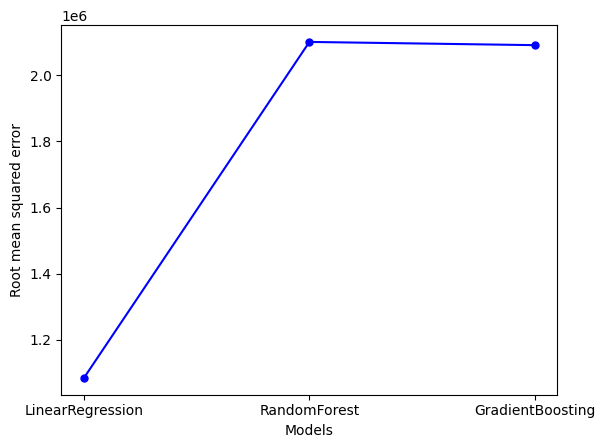

In [203]:
plt.plot(labels,rmse_scores,marker=".",color="blue",markersize=10)
plt.xlabel("Models")
plt.ylabel("Root mean squared error")

Text(0, 0.5, 'R2 Score')

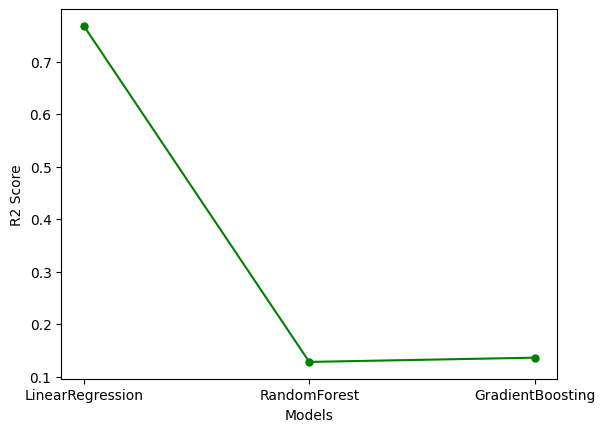

In [204]:
plt.plot(labels,r2_scores,marker=".",color="green",markersize=10)
plt.xlabel("Models")
plt.ylabel("R2 Score")

In [217]:
least_mae=min(mae_lr,mae_rf,mae_gb)
least_rmse=min(rmse_lr,rmse_rf,rmse_gb)
max_r2=max(r2_lr,r2_rf,r2_gb)
print("Least MAE is ",least_mae)
print("Least RMSE is ",least_rmse)
print("Max R2 Score is ",max_r2)


Least MAE is  206916.65300354923
Least RMSE is  1084201.2424437725
Max R2 Score is  0.7678060153426312


In [191]:
best_model=lr
joblib.dump(best_model,"best_model.pkl")

['best_model.pkl']